In [1]:
import seaborn as sns
import numpy as np

In [63]:
rnd = np.random.RandomState(42)
data = rnd.normal(0, 0.5, size=7)
data

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641])

# Tenemos pocos datos
queremos tener una estimacion de la distribucion

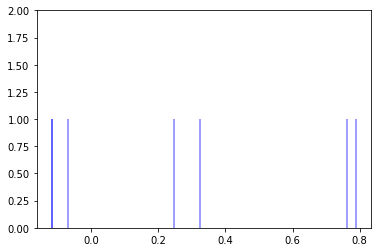

In [75]:
plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
plt.ylim(0, 2);

# Un histograma no nos dice mucho

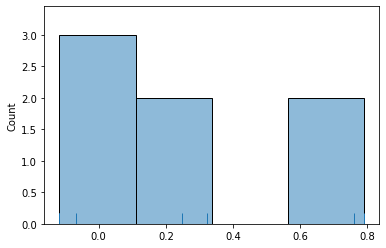

In [57]:
sns.histplot(data, alpha=0.5);
sns.rugplot(data, height=0.05);

# Podemos poner una distribucion normal centrada en cada datapoint

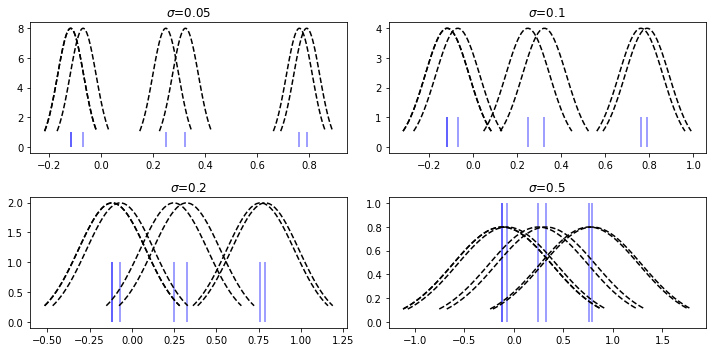

In [82]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(10,5))
stds = [0.05, 0.1, 0.2, 0.5]
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
  std = stds[i]
  for e in data:
    x = np.linspace(e - 2*std, e + 2*std)
    distr = norm(e, std)
    plt.plot(x, distr.pdf(x), 'k--')
  plt.title(f'$\sigma$={std}')
plt.tight_layout()

# Y luego sumar esas distribuciones

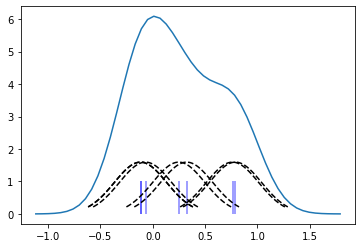

In [89]:
plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
std = 0.25 # juga con esto

for e in data:
  x = np.linspace(e - 2*std, e + 2*std)
  distr = norm(e, std)
  plt.plot(x, distr.pdf(x), 'k--')

x = np.linspace(data.min() - 1, data.max() + 1)
kde = lambda x: sum(norm(e, std).pdf(x) for e in data)
plt.plot(x, kde(x));

# Obviamente ya viene en seaborn implementado

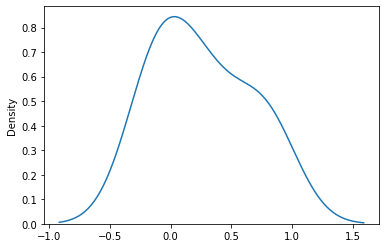

In [64]:
sns.kdeplot(data)